In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x)*(1-sigmoid(x))

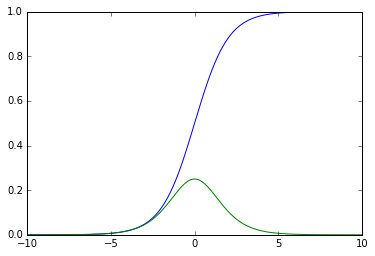

In [3]:
X = np.linspace(-10, 10, 256, endpoint=True)
C,S = sigmoid(X), sigmoidPrime(X)
plt.plot(X,C)
plt.plot(X,S)

In [4]:
# I will interpret the one node output >= 0.5 as 1(Yes), < 0.5 as 0(No)
# Analyse our dataset, I will start with gameData:


In [5]:
game_df = pd.read_excel('gameData.xlsx' , skiprows = 2, header = 0)
# Enumeric     
game = game_df.replace(['Good', 'Fair', 'Poor', 'Yes', 'No'], [1, 2, 3, 4, 5])

trainset = game.loc[0:21]
testset = game.loc[26:30] 

#game
train_X= trainset.ix[:,0:4]
train_X = np.matrix(train_X).astype(np.float32)

In [6]:
#game

In [7]:
# there are four outputs: 0--Attact, 1--Run, 2--Wander, 3--Hide, use 
#(1,0,0,0),(0,1,0,0,),(0,0,1,0),(0,0,0,1)to represent respectively.
datalen = trainset['Action'].shape[0]
train_Y = np.zeros((datalen,4),dtype = 'float32')

In [8]:
for i in range(datalen):
    if trainset['Action'][i]=="Attact":
        train_Y[i][0]=1
    elif trainset['Action'][i]=="Run":
        train_Y[i][1]=1
    elif trainset['Action'][i]=="Wander":
        train_Y[i][2]=1
    elif trainset['Action'][i]=="Hide":
        train_Y[i][3]=1
train_Y = np.matrix(train_Y)

In [9]:
#train_Y

In [10]:
train_Y[1].T

matrix([[ 0.],
        [ 1.],
        [ 0.],
        [ 0.]], dtype=float32)

In [102]:
train = zip(train_X,train_Y)
train = list(train)
train[1]

(matrix([[ 1.,  4.,  5.,  2.]], dtype=float32),
 matrix([[ 0.,  1.,  0.,  0.]], dtype=float32))

In [12]:
def splitData(dataset,percentage):    # randomly split the dataset by percentage
    np.random.shuffle(dataset)
    n = int(round(len(dataset)*percentage))
    trainset = dataset[:n]
    testset = dataset[n:]
    return trainset, testset

In [13]:
# The aim is to find the weights and biases which make the cost as small as possible.
# Cost = 1/2*(t-y)**2

In [14]:
layers = [4, 3, 4]; #setup layers

In [103]:
# A0 = inputNode   -- 4 nodes here
# Z1 = W1 * A0 + bias1    -- 3 nodes, 3 bias values, 3 * 4 weights
# A1 = sigmoid(Z1) ...
# Z2 = W2 * A1 + bias2    -- 4 nodes, 4 bias values, 4 * 4 weights
# output = A2 = sigmoid(Z2)

#initialize weights
weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]

#initialize bias
bias = [np.random.randn(y, 1) for y in layers[1:]]

In [104]:
 weights[0],bias[0]

(array([[ 2.37816277, -0.29695   ,  1.20244774,  1.39444185],
        [ 0.67323576, -0.12835038,  1.85705288, -0.1418754 ],
        [-0.82414668,  1.8451888 ,  0.40567743, -0.55333692]]),
 array([[-0.53789438],
        [ 0.72424581],
        [-0.19653951]]))

In [105]:
# forward the input to output, store every value in each layer
inputs = train_X[1].T   
a = inputs     # a[0] = inputs
alist = [] 
alist.append(a)
zlist = [] 
for b, w in zip(bias, weights):
    z = np.dot(w, a)+b
    zlist.append(z)
    a = sigmoid(z)
    alist.append(a)
    
outputs = alist[-1]      # outcomes of 4 nodes
t = train_Y[1].T           # target
t

matrix([[ 0.],
        [ 1.],
        [ 0.],
        [ 0.]], dtype=float32)

In [106]:
predict = np.argmax(outputs)       #  the higest value index, 1 means 1--Run
predict==np.argmax(train_Y[1])

False

In [109]:
#For each output unit j, calculate the error: E_j = (t - outputs)*outputs*(1-outputs)

#For each hidden unit i, calculate the error: E_i = a(1-a)*sum(W*E)
outputs 

matrix([[ 0.61965251],
        [ 0.32969076],
        [ 0.2955792 ],
        [ 0.18743095]])

In [107]:
E1 = 0.5 * np.array((outputs - t)) ** 2
E1

array([[ 0.19198462],
       [ 0.22465724],
       [ 0.04368353],
       [ 0.01756518]])

In [114]:
# Error Backpropagation
# partial cost: (a - t)* sigmoidPrime(z)
delta_b = [np.zeros(b.shape) for b in bias]
delta_w = [np.zeros(b.shape) for b in weights]
delta1 = (np.array(alist[-1]) - np.array(t)) * sigmoidPrime(np.array(zlist[-1]))
delta_b[-1] = delta1
delta_w[-1] = np.dot(delta1, np.array(alist[-2].T))
delta2 = np.dot(weights[-1].T, delta1) * sigmoidPrime(np.array(zlist[-2]))
delta_b[-2] = delta2
delta_w[-2] = np.dot(delta2, np.array(alist[-3].T))

In [115]:
delta_b[-1]

array([[ 0.61965251],
       [-0.67030924],
       [ 0.2955792 ],
       [ 0.18743095]])

In [116]:
# Update the weights and bias 
eta = 0.01     # learning rate
bias = [b - eta*dta_b for b ,dta_b in zip(bias, delta_b)]
weights = [b - eta*dta_w for b ,dta_w in zip(weights, delta_w)]

In [113]:
np.array(alist[-1]) - np.array(t

array([[ 0.61965251],
       [-0.67030924],
       [ 0.2955792 ],
       [ 0.18743095]])

In [25]:
# weights      # updated weights

In [153]:
# forward again and repeat 
# Now wrapping all functions above together as a class NNW

class NNW(object):
    def __init__(self, layers):
        self.weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]
        self.bias = [np.random.randn(y, 1) for y in layers[1:]]
        self.w = []
        for i in range(1, len(layers) - 1):
            self.w.append((2*np.random.random((layers[i - 1] + 1, layers[i]
                                + 1))-1)*0.25)
        self.w.append((2*np.random.random((layers[i] + 1, layers[i +
                            1]))-1)*0.25)
        
    def forwardAll(self, x):
        inputs = x.T   
        a = inputs     # a[0] = inputs
        alist = [] 
        alist.append(a)
        zlist = [] 
        for b, w in zip(self.bias, self.weights):
            z = np.dot(w, a)+b
            zlist.append(z)
            a = sigmoid(z)
            alist.append(a)
        return alist, zlist
    
    def outcome(self,x):
        a = x.T
        for b, w in zip(self.bias, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    def predict(self,x):
        a = x.T
        for b, w in zip(self.bias, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        predi = np.argmax(a)
        return predi   
  
    def backpro(self,x,t):
        delta_b = [np.zeros(b.shape) for b in self.bias]
        delta_w = [np.zeros(b.shape) for b in self.weights]
        alist, zlist = self.forwardAll(x)
        delta1 = (np.array(alist[-1]) - np.array(t)) * sigmoidPrime(np.array(zlist[-1]))
        delta_b[-1] = delta1
        delta_w[-1] = np.dot(delta1, np.array(alist[-2].T))
        delta2 = np.dot(self.weights[-1].T, delta1) * sigmoidPrime(np.array(zlist[-2]))
        delta_b[-2] = delta2
        delta_w[-2] = np.dot(delta2, np.array(alist[-3].T))  # pay attention to the data type!!!
        return delta_b, delta_w
    
    def fit(self,trainset,eta,epoch):
        m = len(trainset)
        cost = []
        for e in range(epoch):
            b = [np.zeros(k.shape) for k in self.bias]   # reset to zeros
            #print(b)
            w = [np.zeros(k.shape) for k in self.weights]
            #print(w)
            for x, y in trainset:
                t = y.T
                dt_b,dt_w = self.backpro(x,t)
                delta_b = [i+j for i, j in zip(b,dt_b )]
                delta_w = [i+j for i, j in zip(w,dt_w)]
            self.bias = [i-(eta*j/m) for i, j in zip(self.bias, delta_b)]
            self.weights = [i-(eta*j/m) for i, j in zip(self.weights, delta_w)]
            c = self.crossCost(trainset)
            cost.append(c)
        plt.plot(cost)
            #print(self.bias)
            #print(self.weights)
            
    def fitOnline(self, x,y, eta,epoch):
        cost = []
        for e in range(epoch):
            b = [np.zeros(k.shape) for k in self.bias]   # reset to zeros
            #print(b)
            w = [np.zeros(k.shape) for k in self.weights]
            #print(w)
            t = y.T
            dt_b,dt_w = self.backpro(x,t)            
            delta_b = [i+j for i, j in zip(b,dt_b )]
            delta_w = [i+j for i, j in zip(w,dt_w)]
            self.bias = [i-(eta*j) for i, j in zip(self.bias, delta_b)]
            self.weights = [i-(eta*j) for i, j in zip(self.weights, delta_w)]
            c = 0.5 * (self.outcome(x)-y)**2
            cost.append(c)
        print(cost)
        
    def error( self,x, t ):
        outputs = self.outcome(x)  
        return 0.5 * np.sum( np.power(outputs - t,2) )
        
            
    def accuracy(self,testset):
        m = len(testset)
        count = 0
        for x,t in testset:
            y = t.T
            print(len(y))
            if len(y)>1:
                p = self.predict(x)
                print(p)
                t = np.argmax(y)
                print(t)
                print("\n")
            elif len(y)==1:
                t = y
                print(t)
                o = self.outcome(x)
                print (o)
                if o > 0.5:
                    p = 1
                else:
                    p = 0
            if p == t:
                count += 1                  
        acc = 1.0 * count / m * 100
        return acc
    
    
    
    def costFunc(self, dataset):
        cost = 0.0
        for x, t in dataset:
            a = self.outcome(x)
            cost += 0.5*np.linalg.norm(a-t)**2/len(dataset)
        return cost
    
    
    def crossCost( self, dataset, derivative=False ):
        cost = 0.0
        for x, t in dataset:
            outputs = self.outcome(x)
            if derivative:
                cost += (outputs - t) / (outputs * (1 - outputs)) 
            else:
                cost += np.mean(-np.sum(t * np.log( outputs ) + (1 - t) * np.log(1 - outputs), axis=1))
            return cost/len(dataset)



In [140]:
NN = NNW([4,6,4])
#NN.weights, NN.bias

In [141]:
trainset, testset = splitData(train, 0.8)

In [142]:
#for x, y in trainset:
 #   print (len(y.T))

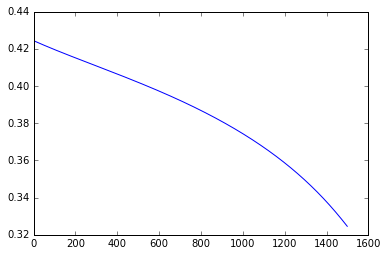

In [143]:
NN.fit(trainset,0.1,1500)

In [67]:
ac = NN.accuracy(trainset)
ac

4
2
0


4
2
2


4
2
3


4
2
1


4
2
3


4
2
1


4
2
1


4
2
3


4
2
3


4
2
0


4
2
2


4
2
0


4
2
3


4
2
1


4
2
0


4
2
0


4
2
0


4
2
0




11.11111111111111

In [68]:
#try fishing dataset
fishing_df = pd.read_excel(
                'fishingData.xlsx', skiprows = 2, header = 0 )
# Enumeric     
fishing = fishing_df.replace(['Strong', 'Weak', 'Warm', 'Moderate', 
                   'Cold','Cool','Sunny','Cloudy','Rainy','Yes','No'], 
                     [1, 2, 3, 4, 5,6,7,8,9,1,0])
                     
fishing_training = fishing.loc[0:13]
fishing_test = fishing.loc[19:19] 

      
fishing_X = fishing_training.ix[:,0:4] 
fishing_X = np.matrix(fishing_X).astype(np.float32)

fishing_Y = fishing_training.ix[:,4:5]
fishing_Y = np.matrix(fishing_Y).astype(np.float32)

test = fishing_test.ix[:,0:4]

In [69]:
fishingset = zip(fishing_X,fishing_Y)
fishingset = list(fishingset)

In [101]:
fishing_df

,Wind,Water,Air,Forecast,Fish?
0,Strong,Warm,Warm,Sunny,Yes
1,Weak,Warm,Warm,Sunny,No
2,Strong,Warm,Warm,Cloudy,Yes
3,Strong,Moderate,Warm,Rainy,Yes
4,Strong,Cold,Cool,Rainy,No
5,Weak,Cold,Cool,Rainy,No
6,Weak,Cold,Cool,Sunny,No
7,Strong,Moderate,Warm,Sunny,Yes
8,Strong,Cold,Cool,Sunny,Yes
9,Strong,Moderate,Cool,Rainy,No


In [122]:
FN = NNW([4,6,1])
#NN.weights, NN.bias
fish_train, fish_test = splitData(fishingset, 0.2)

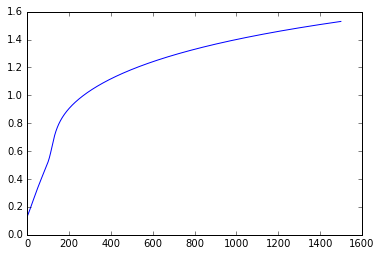

In [123]:
FN.fit(fish_train, 0.05, 1500)

In [124]:
FN.accuracy(fish_train)

1
[[ 1.]]
[[ 0.01016822]]
1
[[ 1.]]
[[ 0.01049136]]
1
[[ 0.]]
[[ 0.00956553]]


33.33333333333333

In [100]:
fish_train

[(matrix([[ 2.,  5.,  6.,  7.]], dtype=float32),
  matrix([[ 0.]], dtype=float32)),
 (matrix([[ 1.,  4.,  3.,  7.]], dtype=float32),
  matrix([[ 1.]], dtype=float32)),
 (matrix([[ 1.,  3.,  6.,  7.]], dtype=float32),
  matrix([[ 1.]], dtype=float32))]

In [125]:
fishing_Y


matrix([[ 1.],
        [ 0.],
        [ 1.],
        [ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 1.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 0.]], dtype=float32)

In [867]:
FN.costFunc(fish_train)

0.1363532619810702

In [144]:
XX = np.matrix([[0, 0], [0, 1], [1, 0], [1, 1]])
YY= np.matrix([[0], [1], [1], [0]])

In [145]:
XXYY = zip(XX,YY)

In [146]:
XXYY=list(XXYY)

In [154]:
XXYYNN = NNW([2,4,1])

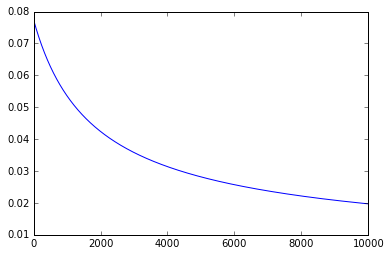

In [151]:
XXYYNN.fit(XXYY,0.05,10000)

In [152]:
XXYYNN.outcome(XX)

matrix([[ 0.07579079,  0.06912453,  0.06307976,  0.06257147]])

In [155]:
XXYYNN.w

[array([[ 0.14584609, -0.01646064, -0.13942471, -0.0745353 , -0.13833091],
        [ 0.11796992, -0.14706935,  0.10025101, -0.14960364, -0.00204928],
        [ 0.02070564,  0.13890207, -0.24961248,  0.08551349,  0.06243497]]),
 array([[ 0.03967346],
        [-0.19004994],
        [-0.07309223],
        [-0.16903579],
        [ 0.09659413]])]

In [160]:
XXYYNN.weights

[array([[-1.19649318,  0.19291755],
        [ 0.45408778, -0.75819461],
        [-0.27557792,  1.38001985],
        [-0.0634638 , -1.06087879]]),
 array([[ 0.7752201 , -0.36834505, -0.77071008,  0.16904494]])]